<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220930.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* customer analysis
* iterator

In [1]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone, timedelta
import matplotlib.pyplot as plt 
import seaborn as sns

import re
import os 
from functools import reduce

# customer analysis

In [7]:
os.listdir()

['.config',
 'online_retail_II.xlsx',
 '1_order_payments_dataset.csv',
 'ecommerce-data.csv',
 '1_orders_dataset.csv',
 'mall_customers.csv',
 'test.csv',
 '1_customers_dataset.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'scanner_data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sample_data']

In [11]:
df_pay = pd.read_csv('1_order_payments_dataset.csv')
df_pay.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [10]:
df_ord = pd.read_csv('1_orders_dataset.csv')
df_ord.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 0:28:42,2017-12-15 0:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 0:00:00


In [60]:
df_ord["order_purchase_timestamp"] = pd.to_datetime(df_ord["order_purchase_timestamp"])
df_ord["order_delivered_customer_date"] = pd.to_datetime(df_ord["order_delivered_customer_date"])

In [64]:
df_ord['diff'] = (df_ord.order_delivered_customer_date - df_ord.order_purchase_timestamp).dt.days
df_ord = df_ord[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'diff']]
df_ord = df_ord.rename(columns = {'order_purchase_timestamp':'order_date'})
df_ord.head()

,order_id,customer_id,order_status,order_date,diff
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2.0


In [66]:
df_cus = pd.read_csv('1_customers_dataset.csv')
df_cus = df_cus[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state']]
df_cus = df_cus.rename(columns = {'customer_unique_id':'customer_uid', 'customer_city':'city', 'customer_state':'state'})
df_cus.head()

,customer_id,customer_uid,city,state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP


In [68]:
df = pd.merge(pd.merge(df_pay, df_ord, 'left', 'order_id'), df_cus, 'left', 'customer_id')
df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_date,diff,customer_uid,city,state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,13.0,708ab75d2a007f0564aedd11139c7708,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,3.0,a8b9d3a27068454b1c98cc67d4e31e6f,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,6.0,6f70c0b2f7552832ba46eb57b1c5651e,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,14.0,87695ed086ebd36f20404c82d20fca87,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,11.0,4291db0da71914754618cd789aebcd56,conchas,SP


In [69]:
df['date'] = df.order_date.to_numpy().astype('datetime64[D]')
df['week'] = df['date'] - df['date'].dt.weekday.astype('timedelta64[D]')
df['month'] = df.order_date.to_numpy().astype('datetime64[M]')
df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_date,diff,customer_uid,city,state,date,week,month
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,13.0,708ab75d2a007f0564aedd11139c7708,teofilo otoni,MG,2018-04-25,2018-04-23,2018-04-01
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,3.0,a8b9d3a27068454b1c98cc67d4e31e6f,sao paulo,SP,2018-06-26,2018-06-25,2018-06-01
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,6.0,6f70c0b2f7552832ba46eb57b1c5651e,sao paulo,SP,2017-12-12,2017-12-11,2017-12-01
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,14.0,87695ed086ebd36f20404c82d20fca87,juiz de fora,MG,2017-12-06,2017-12-04,2017-12-01
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,11.0,4291db0da71914754618cd789aebcd56,conchas,SP,2018-05-21,2018-05-21,2018-05-01


In [87]:
cnt = df.groupby(['month', 'state']).agg({'diff':'mean', 'customer_id':'count', 'payment_value':'sum'}).reset_index()
cnt = cnt.rename(columns = {'customer_id':'cnt', 'payment_value':'rev'})
cnt['ratio_cnt'] = cnt.groupby(['month'])['cnt'].apply(lambda x : round(x/x.sum()*100,2))
cnt['ratio_rev'] = cnt.groupby(['month'])['rev'].apply(lambda x : round(x/x.sum()*100,2))
cnt = pd.melt(cnt, id_vars = ['month','state','diff','cnt','ratio_cnt'], var_name = 'type')
cnt.head()

,month,state,diff,cnt,ratio_cnt,type,value
0,2016-09-01,RR,NaN,1,33.33,rev,136.23
1,2016-09-01,RS,NaN,1,33.33,rev,75.06
2,2016-09-01,SP,NaN,1,33.33,rev,40.95
3,2016-10-01,AL,33.000000,2,0.58,rev,129.90
4,2016-10-01,BA,20.333333,4,1.17,rev,995.34


/usr/local/lib/python3.7/dist-packages/plotnine/facets/facet.py:393: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


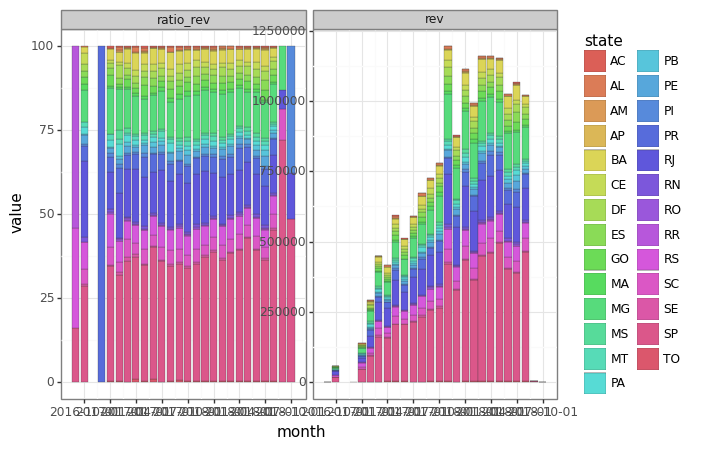

<ggplot: (8776446636797)>

In [88]:
(
    ggplot(cnt, aes('month', 'value', fill = 'state')) +
    gg.geom_col(color = '#333333', size = 0.1) +
    gg.facet_wrap('~type', scales = 'free_y') +
    gg.theme_bw()
)

# iterator

In [2]:
mat = [list('ABC'), list('DEF'), list('GHI')]
a = {letter : [r, c] for r, rows in enumerate(mat) for c, letter in enumerate(rows)}
arr = np.empty([3,3], dtype = 'object')
for k, v in a.items() :
  arr[v[0], v[1]] = k
arr

array([['A', 'B', 'C'],
       ['D', 'E', 'F'],
       ['G', 'H', 'I']], dtype=object)

In [5]:
def add_arthor_with_name(name) :
  def add_arthor(func) :
    def wrapper(*args, **kwargs) :
      return name + '\n' + func(*args, **kwargs)
    return wrapper
  return add_arthor

def calc_time(func) :
  def wrapper(*args, **kwargs) :
    a = datetime.now() 
    func(*args, **kwargs)
    b = datetime.now()
    print({b - a})
    return func(*args, **kwargs)
  return wrapper 

@calc_time
@add_arthor_with_name('kim')
def get_title(title) :
  return title

In [6]:
print(get_title('아무 것도 넌 몰랐잖아'))

{datetime.timedelta(microseconds=13)}
kim
아무 것도 넌 몰랐잖아
